In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [2]:
# Chargement des données
data = pd.read_csv('StudentPerformanceFactors.csv')

In [3]:
# visualiser les donnees
data.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
#Afficher la taille du jeu de donnees
data.shape

(6607, 20)

In [5]:
# Calculer le nombre de données manquantes par colonne
missing_counts = data.isnull().sum()

# Calculer le pourcentage de données manquantes par colonne
missing_percentage = (missing_counts / len(data)) * 100

# Créer un DataFrame pour afficher les résultats
missing_data_summary = pd.DataFrame({
    'Nombre de données manquantes': missing_counts,
    'Pourcentage (%)': missing_percentage
})

# Afficher le résumé des données manquantes
missing_data_summary

,Nombre de données manquantes,Pourcentage (%)
Hours_Studied,0,0.000000
Attendance,0,0.000000
Parental_Involvement,0,0.000000
Access_to_Resources,0,0.000000
Extracurricular_Activities,0,0.000000
Sleep_Hours,0,0.000000
Previous_Scores,0,0.000000
Motivation_Level,0,0.000000
Internet_Access,0,0.000000
Tutoring_Sessions,0,0.000000


In [6]:
# Supprimer les lignes contenant des données manquantes
data_cleaned = data.dropna()
print(f'dimension des donnees origoinales ; {data.shape}')
print(f'Dimension apres suppresion des valeurs manquentes: {data_cleaned.shape}')


dimension des donnees origoinales ; (6607, 20)
Dimension apres suppresion des valeurs manquentes: (6378, 20)


In [7]:
# Afficher un résumé général des données
print("Résumé général des données :")
print(data_cleaned.info())

Résumé général des données :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence     

In [8]:
# Sélectionner les colonnes de type 'int'
int_columns = data_cleaned.select_dtypes(include=['int64'])

# Afficher les colonnes de type 'int'
print("Colonnes de type 'int' :")
int_columns.head()

Colonnes de type 'int' :


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70


In [9]:
# Vérifier les doublons
duplicates = data[data.duplicated()]

# Compter le nombre de doublons
num_duplicates = duplicates.shape[0]

# Afficher les doublons et leur nombre
print(f"Nombre de doublons: {num_duplicates}")

# Optionnel: Afficher les lignes dupliquées en excluant les doublons exacts
print("Lignes avec doublons en excluant la première occurrence:")
data[data.duplicated(keep='first')]

Nombre de doublons: 0
Lignes avec doublons en excluant la première occurrence:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score


In [17]:
# Supprimer les doublons
data_no_duplicates = data.drop_duplicates()

# Afficher les dimensions avant et après suppression des doublons
print(f"Dimensions avant suppression des doublons: {data.shape}")
print(f"Dimensions après suppression des doublons: {data_no_duplicates.shape}")

# Afficher les premières lignes du DataFrame nettoyé
data_no_duplicates.head()


Dimensions avant suppression des doublons: (6607, 20)
Dimensions après suppression des doublons: (6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,24,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,4,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,38,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,29,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,32,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


Matrice de corrélation :
                   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Hours_Studied           1.000000   -0.004997     0.013119         0.022492   
Attendance             -0.004997    1.000000    -0.019602        -0.018083   
Sleep_Hours             0.013119   -0.019602     1.000000        -0.023238   
Previous_Scores         0.022492   -0.018083    -0.023238         1.000000   
Tutoring_Sessions      -0.009654    0.012070    -0.011466        -0.013158   
Physical_Activity       0.003183   -0.022976    -0.002898        -0.006694   
Exam_Score              0.445104    0.580259    -0.017171         0.174283   

                   Tutoring_Sessions  Physical_Activity  Exam_Score  
Hours_Studied              -0.009654           0.003183    0.445104  
Attendance                  0.012070          -0.022976    0.580259  
Sleep_Hours                -0.011466          -0.002898   -0.017171  
Previous_Scores            -0.013158          -0.006694    0.174283  


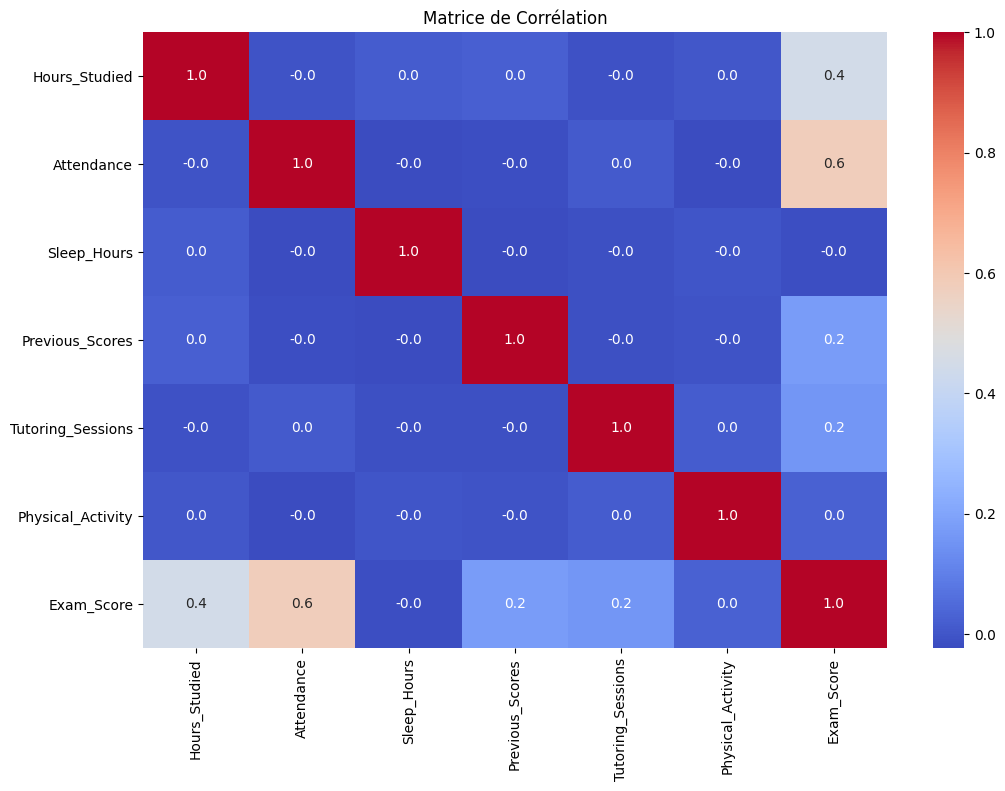

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation pour les variables numériques
correlation_matrix = int_columns.corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation :")
print(correlation_matrix)

# Visualiser la matrice de corrélation avec un heatmap

# Création d'une nouvelle figure avec une taille spécifique
plt.figure(figsize=(12, 8))
# plt.figure(figsize=(12, 8)) : Crée une nouvelle figure de 12 pouces de large et 8 pouces de haut.
# Cela permet de contrôler la taille du graphique affiché.

# Création de la heatmap avec les paramètres spécifiés
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
# sns.heatmap : Crée une heatmap qui visualise la matrice de corrélation.
# correlation_matrix : La matrice de corrélation qui montre les corrélations entre les variables.
# annot=True : Affiche les valeurs numériques à l'intérieur de chaque cellule de la heatmap.
# cmap='coolwarm' : Utilise la palette de couleurs 'coolwarm', qui va du bleu (valeurs basses) au rouge (valeurs élevées).
# fmt='.2f' : Formate les annotations numériques dans les cellules pour afficher deux décimales.

# Ajout du titre de la heatmap
plt.title('Matrice de Corrélation')
# plt.title('Matrice de Corrélation') : Définit le titre du graphique pour indiquer qu'il s'agit d'une matrice de corrélation.

# Affichage du graphique
plt.show()
# plt.show() : Affiche le graphique généré dans la sortie standard, que ce soit dans une fenêtre de graphique ou un notebook.


Matrice de corrélation :
                            Hours_Studied  Attendance  Parental_Involvement  \
Hours_Studied                    1.000000   -0.009908              0.007207   
Attendance                      -0.009908    1.000000             -0.004940   
Parental_Involvement             0.007207   -0.004940              1.000000   
Access_to_Resources             -0.007909    0.000862              0.010476   
Extracurricular_Activities      -0.006017   -0.002222              0.022225   
Sleep_Hours                      0.010977   -0.015918              0.001280   
Previous_Scores                  0.024846   -0.020186              0.005094   
Motivation_Level                 0.022092    0.013098             -0.013449   
Internet_Access                  0.005038   -0.018318              0.001863   
Tutoring_Sessions               -0.014282    0.014324             -0.007655   
Family_Income                    0.010025   -0.008097              0.005080   
Teacher_Quality            

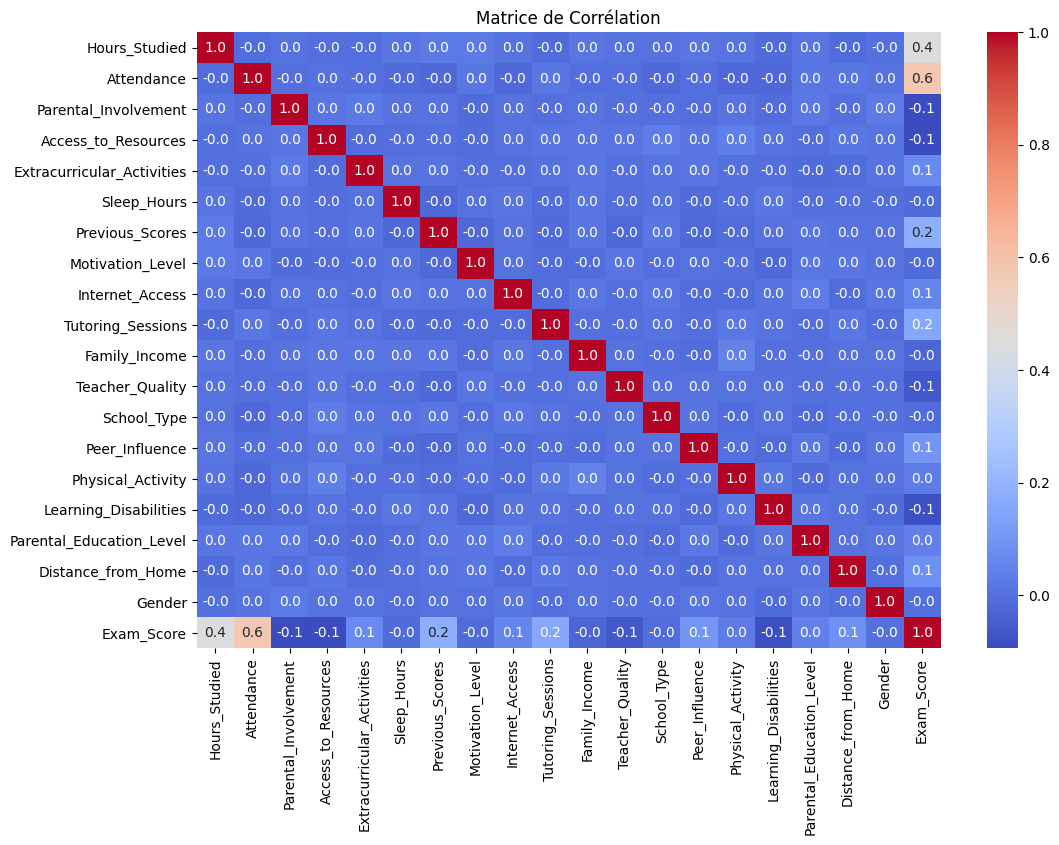

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation pour les variables numériques
correlation_matrix = data_no_duplicates.corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation :")
print(correlation_matrix)

# Visualiser la matrice de corrélation avec un heatmap

# Création d'une nouvelle figure avec une taille spécifique
plt.figure(figsize=(12, 8))
# plt.figure(figsize=(12, 8)) : Crée une nouvelle figure de 12 pouces de large et 8 pouces de haut.
# Cela permet de contrôler la taille du graphique affiché.

# Création de la heatmap avec les paramètres spécifiés
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
# sns.heatmap : Crée une heatmap qui visualise la matrice de corrélation.
# correlation_matrix : La matrice de corrélation qui montre les corrélations entre les variables.
# annot=True : Affiche les valeurs numériques à l'intérieur de chaque cellule de la heatmap.
# cmap='coolwarm' : Utilise la palette de couleurs 'coolwarm', qui va du bleu (valeurs basses) au rouge (valeurs élevées).
# fmt='.2f' : Formate les annotations numériques dans les cellules pour afficher deux décimales.

# Ajout du titre de la heatmap
plt.title('Matrice de Corrélation')
# plt.title('Matrice de Corrélation') : Définit le titre du graphique pour indiquer qu'il s'agit d'une matrice de corrélation.

# Affichage du graphique
plt.show()
# plt.show() : Affiche le graphique généré dans la sortie standard, que ce soit dans une fenêtre de graphique ou un notebook.


Matrice de corrélation :
                            Hours_Studied  Attendance  Parental_Involvement  \
Hours_Studied                    1.000000   -0.009908              0.007207   
Attendance                      -0.009908    1.000000             -0.004940   
Parental_Involvement             0.007207   -0.004940              1.000000   
Access_to_Resources             -0.007909    0.000862              0.010476   
Extracurricular_Activities      -0.006017   -0.002222              0.022225   
Sleep_Hours                      0.010977   -0.015918              0.001280   
Previous_Scores                  0.024846   -0.020186              0.005094   
Motivation_Level                 0.022092    0.013098             -0.013449   
Internet_Access                  0.005038   -0.018318              0.001863   
Tutoring_Sessions               -0.014282    0.014324             -0.007655   
Family_Income                    0.010025   -0.008097              0.005080   
Teacher_Quality            

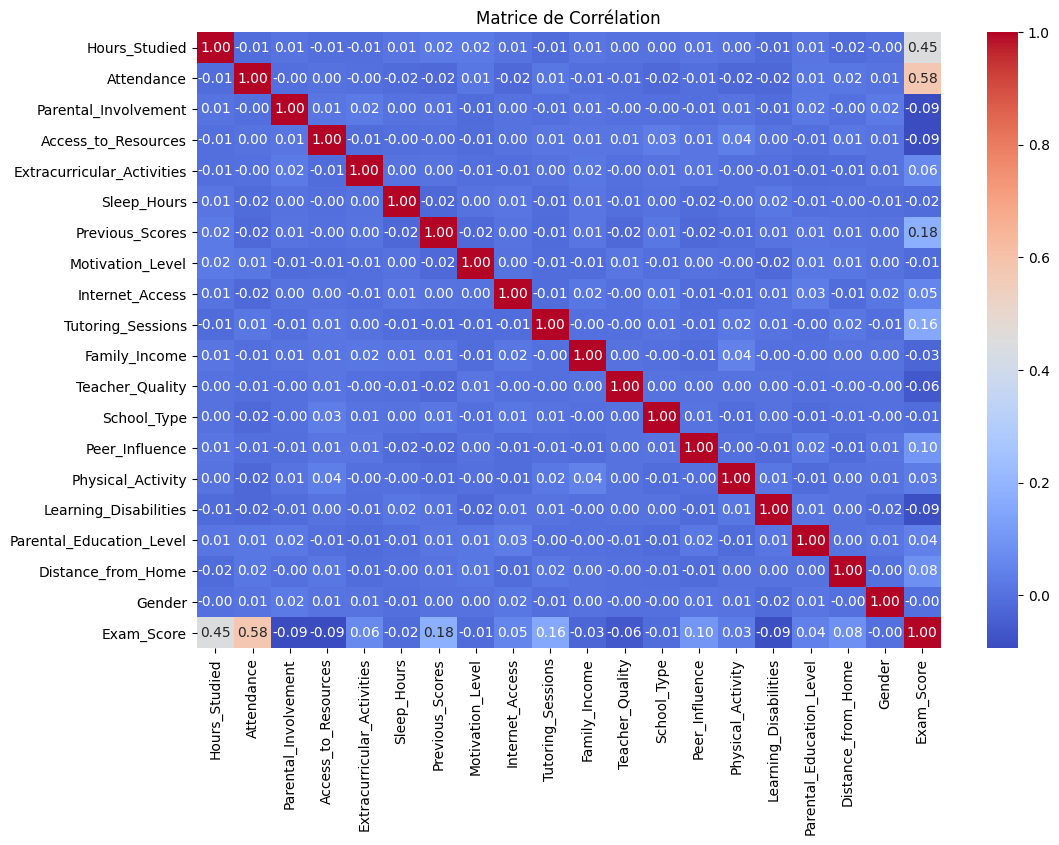

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation pour les variables numériques
correlation_matrix = data.corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation :")
print(correlation_matrix)

# Visualiser la matrice de corrélation avec un heatmap

# Création d'une nouvelle figure avec une taille spécifique
plt.figure(figsize=(12, 8))
# plt.figure(figsize=(12, 8)) : Crée une nouvelle figure de 12 pouces de large et 8 pouces de haut.
# Cela permet de contrôler la taille du graphique affiché.

# Création de la heatmap avec les paramètres spécifiés
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# sns.heatmap : Crée une heatmap qui visualise la matrice de corrélation.
# correlation_matrix : La matrice de corrélation qui montre les corrélations entre les variables.
# annot=True : Affiche les valeurs numériques à l'intérieur de chaque cellule de la heatmap.
# cmap='coolwarm' : Utilise la palette de couleurs 'coolwarm', qui va du bleu (valeurs basses) au rouge (valeurs élevées).
# fmt='.2f' : Formate les annotations numériques dans les cellules pour afficher deux décimales.

# Ajout du titre de la heatmap
plt.title('Matrice de Corrélation')
# plt.title('Matrice de Corrélation') : Définit le titre du graphique pour indiquer qu'il s'agit d'une matrice de corrélation.

# Affichage du graphique
plt.show()
# plt.show() : Affiche le graphique généré dans la sortie standard, que ce soit dans une fenêtre de graphique ou un notebook.


## Encodage des Catégories :

LabelEncoder de la bibliothèque scikit-learn est utilisé pour convertir des variables catégorielles en variables numériques, ce qui est souvent nécessaire pour les algorithmes de machine learning qui nécessitent des entrées numériques. Voici comment cela fonctionne :

Fonctionnement de LabelEncoder
Encodage des Catégories :

LabelEncoder attribue un nombre unique à chaque catégorie dans une variable catégorielle.
Par exemple, si une colonne contient les catégories ['Red', 'Blue', 'Green'], LabelEncoder pourrait les convertir en [0, 1, 2].
Ajustement et Transformation :

fit() : Apprend les catégories uniques dans la variable.
transform() : Convertit les catégories en nombres entiers basés sur l'encodage appris.
fit_transform() : Combine les deux étapes ci-dessus en un seul appel.
Décodage :

Vous pouvez également décoder les nombres entiers en leurs catégories d'origine à l'aide de la méthode inverse_transform().

NB. Utiliser One-hot encoding pour les donnees binaires.

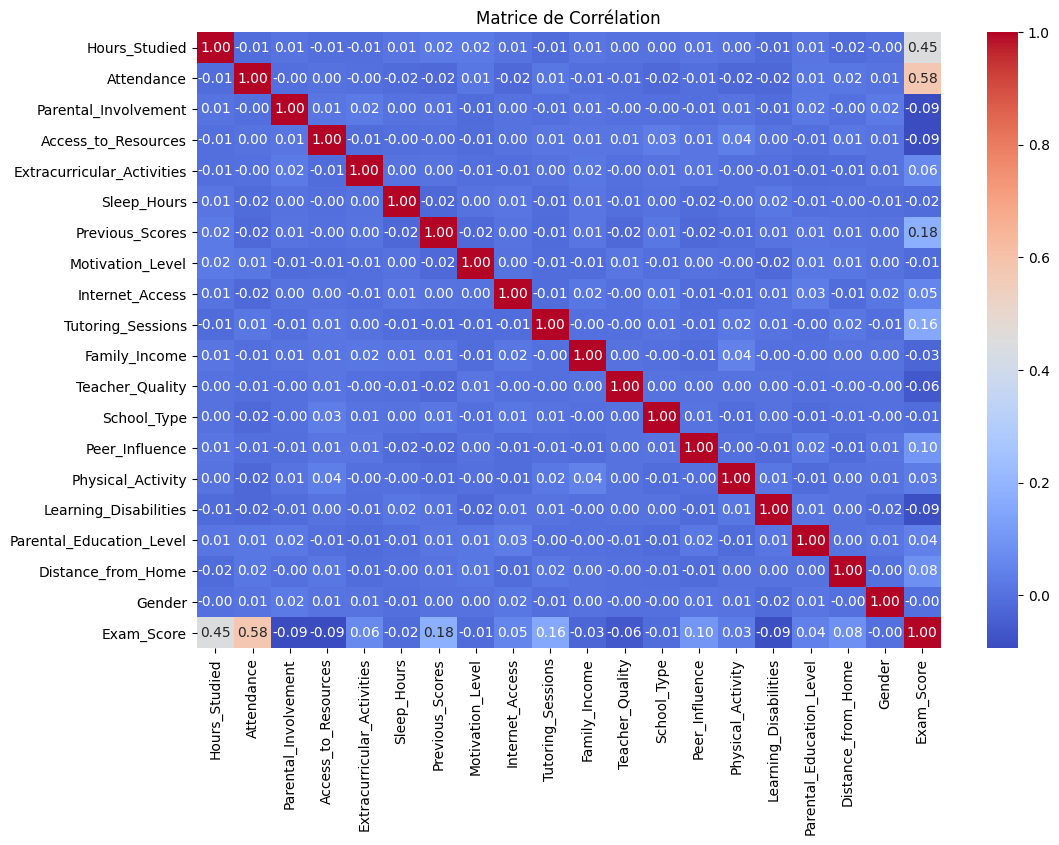

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Convertir les variables qualitatives en numériques
le = LabelEncoder()
categorical_columns = ['Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
                       'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 
                       'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 
                       'Parental_Education_Level', 'Distance_from_Home', 'Gender']

for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

# Calculer la matrice de corrélation
correlation_matrix = data.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()


In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalisation (Min-Max Scaling)
min_max_scaler = MinMaxScaler()
data_normalized = min_max_scaler.fit_transform(data)

# Convertir les résultats normalisés en DataFrame
data_normalized_df = pd.DataFrame(data_normalized, columns=data.columns)

print("Données Normalisées :")
data_normalized_df


Données Normalisées :


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.511628,0.600,0.5,0.0,0.0,0.500000,0.46,0.5,1.0,0.000,0.5,0.666667,1.0,1.0,0.500000,0.0,0.333333,0.666667,1.0,0.260870
1,0.418605,0.100,0.5,1.0,0.0,0.666667,0.18,0.5,1.0,0.250,1.0,0.666667,1.0,0.0,0.666667,0.0,0.000000,0.333333,0.0,0.130435
2,0.534884,0.950,1.0,1.0,1.0,0.500000,0.82,1.0,1.0,0.250,1.0,0.666667,1.0,0.5,0.666667,0.0,0.666667,0.666667,1.0,0.413043
3,0.651163,0.725,0.5,1.0,1.0,0.666667,0.96,1.0,1.0,0.125,1.0,0.666667,1.0,0.0,0.666667,0.0,0.333333,0.333333,1.0,0.347826
4,0.418605,0.800,1.0,1.0,1.0,0.333333,0.30,1.0,1.0,0.375,1.0,0.000000,1.0,0.5,0.666667,0.0,0.000000,0.666667,0.0,0.326087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.558140,0.225,0.0,1.0,0.0,0.500000,0.52,1.0,1.0,0.125,0.0,0.666667,1.0,1.0,0.333333,0.0,0.333333,0.666667,0.0,0.282609
6603,0.511628,0.400,0.0,1.0,0.0,0.666667,0.62,1.0,1.0,0.375,0.5,0.000000,1.0,1.0,0.333333,0.0,0.333333,0.666667,0.0,0.304348
6604,0.441860,0.750,1.0,0.5,1.0,0.333333,0.30,0.5,1.0,0.375,0.5,0.666667,1.0,0.0,0.333333,0.0,0.666667,0.666667,0.0,0.282609
6605,0.209302,0.650,0.0,0.0,1.0,0.333333,0.82,0.0,1.0,0.250,0.5,0.666667,0.0,1.0,0.500000,0.0,0.333333,0.000000,0.0,0.282609


In [24]:
# Standardisation 
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(data)

# Convertir les résultats standardisés en DataFrame
data_standardized_df = pd.DataFrame(data_standardized, columns=data.columns)

print("\nDonnées Standardisées :")
data_standardized_df


Données Standardisées :


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.504942,0.348375,-0.254249,-1.380517,-1.214685,-0.019796,-0.143800,-0.393061,0.285825,-1.213934,-0.284883,0.742375,0.661006,1.070550,0.031411,-0.342867,0.103120,0.717316,0.855746,-0.060578
1,-0.162822,-1.383736,-0.254249,0.913804,-1.214685,0.661399,-1.116110,-0.393061,0.285825,0.411451,1.062448,0.742375,0.661006,-1.575587,1.001199,-0.342867,-1.248688,-0.742280,-1.168570,-1.602931
2,0.671882,1.560853,0.901062,0.913804,0.823259,-0.019796,1.106313,0.884966,0.285825,0.411451,1.062448,0.742375,0.661006,-0.252518,1.001199,-0.342867,1.454927,0.717316,0.855746,1.738833
3,1.506587,0.781403,-0.254249,0.913804,0.823259,0.661399,1.592469,0.884966,0.285825,-0.401242,1.062448,0.742375,0.661006,-1.575587,1.001199,-0.342867,0.103120,-0.742280,0.855746,0.967657
4,-0.162822,1.041220,0.901062,0.913804,0.823259,-0.700990,-0.699406,0.884966,0.285825,1.224144,1.062448,-1.450726,0.661006,-0.252518,1.001199,-0.342867,-1.248688,0.717316,-1.168570,0.710598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.838823,-0.950708,-1.409559,0.913804,-1.214685,-0.019796,0.064552,0.884966,0.285825,-0.401242,-1.632214,0.742375,0.661006,1.070550,-0.938377,-0.342867,0.103120,0.717316,-1.168570,0.196481
6603,0.504942,-0.344469,-1.409559,0.913804,-1.214685,0.661399,0.411806,0.884966,0.285825,1.224144,-0.284883,-1.450726,0.661006,1.070550,-0.938377,-0.342867,0.103120,0.717316,-1.168570,0.453539
6604,0.004119,0.868009,0.901062,-0.233356,0.823259,-0.700990,-0.699406,-0.393061,0.285825,1.224144,-0.284883,0.742375,0.661006,-1.575587,-0.938377,-0.342867,1.454927,0.717316,-1.168570,0.196481
6605,-1.665291,0.521587,-1.409559,-1.380517,0.823259,-0.700990,1.106313,-1.671088,0.285825,0.411451,-0.284883,0.742375,-1.512845,1.070550,0.031411,-0.342867,0.103120,-2.201875,-1.168570,0.196481


In [15]:
# TD 15'

In [16]:
#Fin